In [68]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

import pandas as pd

In [83]:
wine = load_wine()

print(wine.data.shape)
print(wine.target.shape)

(178, 13)
(178,)


In [84]:
pd.DataFrame(wine.data, columns=wine.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [109]:
total_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [108]:
total_x = wine.data
total_y = wine.target

In [110]:
train_x, test_x, train_y, test_y = train_test_split(total_x, total_y, test_size=0.2, stratify=total_y)
train_x.shape, test_x.shape

((142, 13), (36, 13))

<Axes: >

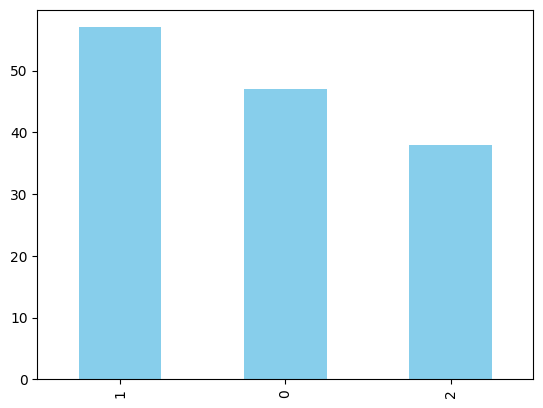

In [111]:
# train_y의 value_counts
pd.Series(train_y).value_counts().plot(kind='bar', color='skyblue')

<Axes: >

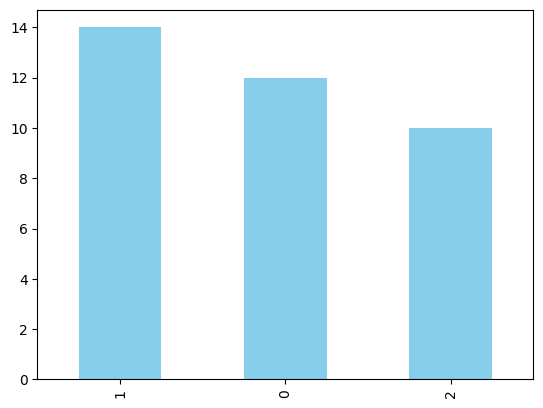

In [112]:
pd.Series(test_y).value_counts().plot(kind='bar', color='skyblue')

# 다층 퍼셉트론 활용(히든레이어 1개)

In [105]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. 데이터 로드 및 전처리
wine = load_wine()
X = wine['data']
y = wine['target']

# 데이터 표준화 (Standardization)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# train, test split (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Tensor로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# TensorDataset 생성
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# 2. 모델 정의
class WineClassifier(nn.Module):
    def __init__(self):
        super(WineClassifier, self).__init__()
        self.fc1 = nn.Linear(13, 50)  # 입력 차원은 13 (특성 수)
        self.fc2 = nn.Linear(50, 3)   # 출력 차원은 3 (클래스 수)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # CrossEntropyLoss는 logits을 받음
        return x

# 3. 모델, 손실 함수, 옵티마이저 설정
model = WineClassifier()
criterion = nn.CrossEntropyLoss()  # 분류 문제이므로 CrossEntropyLoss 사용
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4. 모델 학습
epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')

# 5. 모델 평가
model.eval()
correct = 0
total = 0
with torch.no_grad():  # 평가 시에는 gradient를 계산하지 않음
    for x_batch, y_batch in test_loader:
        y_pred = model(x_batch)
        _, predicted = torch.max(y_pred, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')


Epoch [10/100], Loss: 0.0031
Epoch [20/100], Loss: 0.0010
Epoch [30/100], Loss: 0.0005
Epoch [40/100], Loss: 0.0003
Epoch [50/100], Loss: 0.0002
Epoch [60/100], Loss: 0.0002
Epoch [70/100], Loss: 0.0001
Epoch [80/100], Loss: 0.0001
Epoch [90/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0001
Test Accuracy: 0.9722


# **다층 퍼셉트론 사용(히든레이어 6개)**

In [127]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. 데이터 로드 및 전처리
wine = load_wine()
X = wine['data']
y = wine['target']

# 데이터 표준화 (Standardization)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# train, test split (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Tensor로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# TensorDataset 생성
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=36, shuffle=False)

In [128]:
# 2. 모델 정의 (6개의 히든 레이어)
class WineClassifier(nn.Module):
    def __init__(self):
        super(WineClassifier, self).__init__()
        self.fc1 = nn.Linear(13, 64)  # 입력 차원은 13
        self.fc2 = nn.Linear(64, 128)  # 첫 번째 히든 레이어
        self.fc3 = nn.Linear(128, 64)  # 두 번째 히든 레이어
        self.fc4 = nn.Linear(64, 32)   # 세 번째 히든 레이어
        self.fc5 = nn.Linear(32, 16)   # 네 번째 히든 레이어
        self.fc6 = nn.Linear(16, 8)    # 다섯 번째 히든 레이어
        self.out = nn.Linear(8, 3)     # 출력 레이어 (3개의 클래스)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = self.out(x)  # CrossEntropyLoss는 logits을 받음
        return x

In [143]:
# 3. 모델, 손실 함수, 옵티마이저 설정
model = WineClassifier()
criterion = nn.CrossEntropyLoss()  # 분류 문제이므로 CrossEntropyLoss 사용
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4. 모델 학습
epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')

# 5. 모델 평가
model.eval()
correct = 0
total = 0
with torch.no_grad():  # 평가 시에는 gradient를 계산하지 않음
    for x_batch, y_batch in test_loader:
        y_pred = model(x_batch)
        _, predicted = torch.max(y_pred, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')


Epoch [10/100], Loss: 0.0000
Epoch [20/100], Loss: 0.0000
Epoch [30/100], Loss: 0.0000
Epoch [40/100], Loss: 0.0000
Epoch [50/100], Loss: 0.0000
Epoch [60/100], Loss: 0.0000
Epoch [70/100], Loss: 0.0000
Epoch [80/100], Loss: 0.0000
Epoch [90/100], Loss: 0.0000
Epoch [100/100], Loss: 0.0000
Test Accuracy: 0.9167


In [148]:
result = (predicted==y_batch)

accuracy = result.sum().item() / result.size(0)
print(result)
print(f'Accuracy: {accuracy:.4f}')

tensor([ True, False,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True])
Accuracy: 0.9167
